In [1]:
import pandas as pd
import numpy as np

from importlib import reload

import plotly
import plotly.graph_objs as go
%matplotlib inline

In [2]:
import gameplan.helpers as hp
# import gameplan.income_streams
# import gameplan.expenses
# import gameplan.user
# import gameplan.cashflows
# import gameplan.assets

# reload(gameplan.helpers)
# reload(gameplan.income_streams)
# reload(gameplan.expenses)
# reload(gameplan.user)
# reload(gameplan.cashflows)
# reload(gameplan.assets)
from gameplan.income_streams import IncomeStream, Salary
from gameplan.user import User
# from gameplan.cashflows import CashFlow
# from gameplan.assets import Contribution, CashSavings

import gameplan

In [3]:
usr = User('example@gmail.com')
usr.user_id

'1022232228'

In [4]:
s = Salary(120000/24, payday_freq='SM', next_paycheck_dt=hp.get_offset_date('SM', pd.datetime.today()))

Annual salary is $120,000


,salary
2020-06-15,5000.0
2020-06-30,5000.0
2020-07-15,5000.0
2020-07-31,5000.0
2020-08-15,5000.0


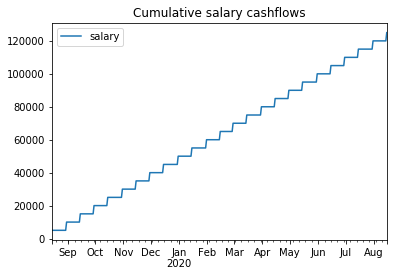

In [5]:
print(f"Annual salary is ${s.annualized_salary:,.0f}")
s.plot_cash_flows(cumulative=True, title='Cumulative salary cashflows')
s.cash_flows_df.tail()

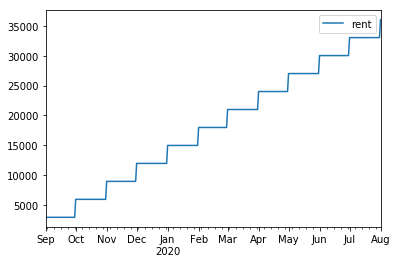

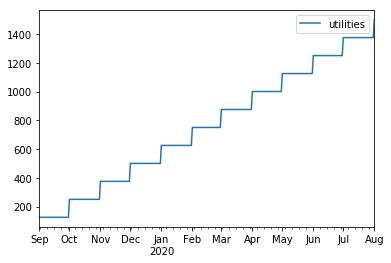

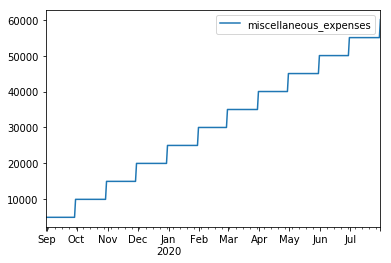

In [6]:
r = gameplan.expenses.Rent(3000)
u = gameplan.expenses.Utilities(125)
misc = gameplan.expenses.Expense(
    expense_type='miscellaneous_expenses', 
    amount=5000, 
    recurring=True, 
    start_dt=pd.datetime.today(),
    freq='M'
)

expenses = [r, u, misc]
for exp in expenses: 
    exp.plot_cash_flows()

In [7]:
usr.add_income_stream(s)
for exp in expenses:
    usr.add_expense(exp)

In [8]:
usr.all_cashflows.agg_cash_flows('Q')

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-09-30,20000.0,-3000.0,-125.0,-10000.0,6875.0
2019-12-31,30000.0,-9000.0,-375.0,-15000.0,5625.0
2020-03-31,30000.0,-9000.0,-375.0,-15000.0,5625.0
2020-06-30,30000.0,-9000.0,-375.0,-15000.0,5625.0
2020-09-30,15000.0,-6000.0,-250.0,-5000.0,3750.0


In [9]:
usr.all_cashflows.total.head()

2019-08-15    5000.0
2019-08-31       0.0
2019-09-01   -3125.0
2019-09-15    5000.0
2019-09-30       0.0
Name: total_net_cash_flow, dtype: float64

In [10]:
usr.all_cashflows.agg_cash_flows('D').head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-08-15,5000.0,0.0,0.0,0.0,5000.0
2019-08-16,0.0,0.0,0.0,0.0,0.0
2019-08-17,0.0,0.0,0.0,0.0,0.0
2019-08-18,0.0,0.0,0.0,0.0,0.0
2019-08-19,0.0,0.0,0.0,0.0,0.0


In [11]:
usr.expenses.total.tail()

2020-06-01   -3125.0
2020-06-30   -5000.0
2020-07-01   -3125.0
2020-07-31   -5000.0
2020-08-01   -3125.0
Name: total_net_expense, dtype: float64

In [12]:
usr.income_streams.total.tail()

2020-06-15    5000.0
2020-06-30    5000.0
2020-07-15    5000.0
2020-07-31    5000.0
2020-08-15    5000.0
Freq: SM-15, Name: total_net_income_stream, dtype: float64

In [13]:
usr.all_cashflows.as_df.head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-08-15,5000.0,0.0,0.0,0.0,5000.0
2019-08-31,5000.0,0.0,0.0,-5000.0,0.0
2019-09-01,0.0,-3000.0,-125.0,0.0,-3125.0
2019-09-15,5000.0,0.0,0.0,0.0,5000.0
2019-09-30,5000.0,0.0,0.0,-5000.0,0.0


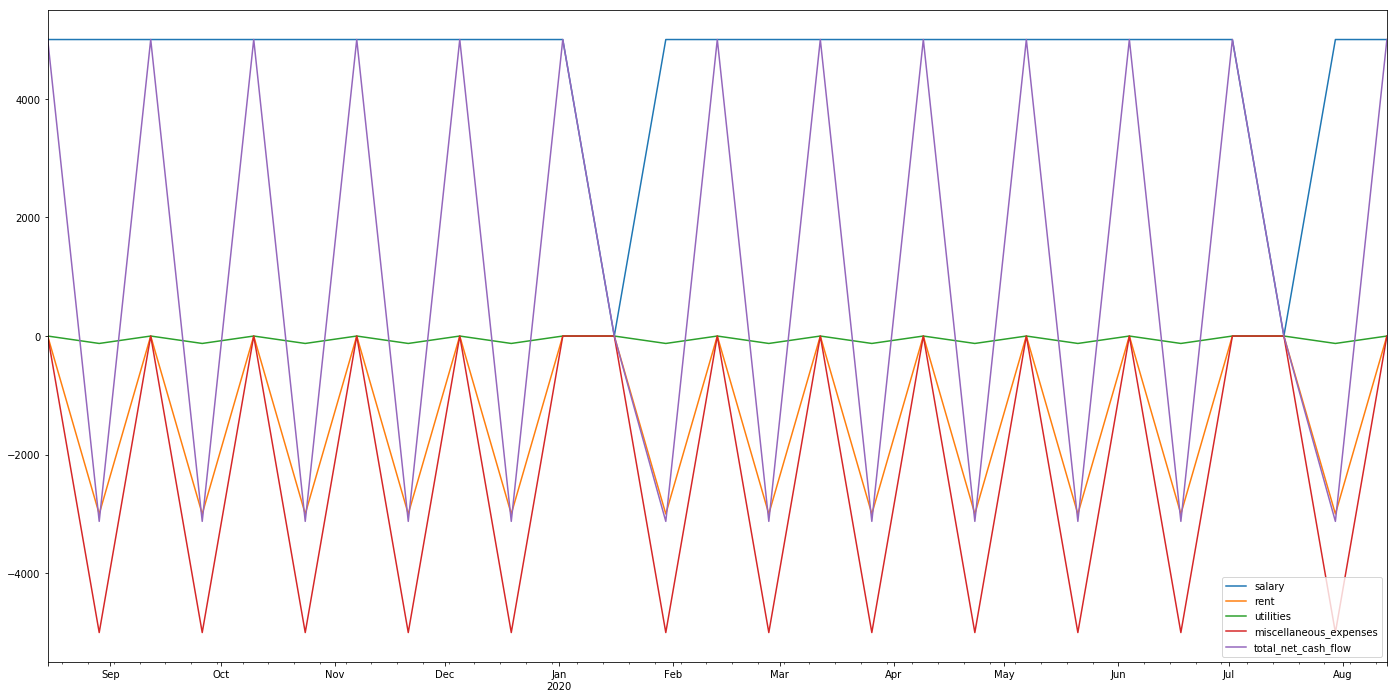

In [14]:
usr.all_cashflows.agg_cash_flows('14D').plot(figsize=(24,12))

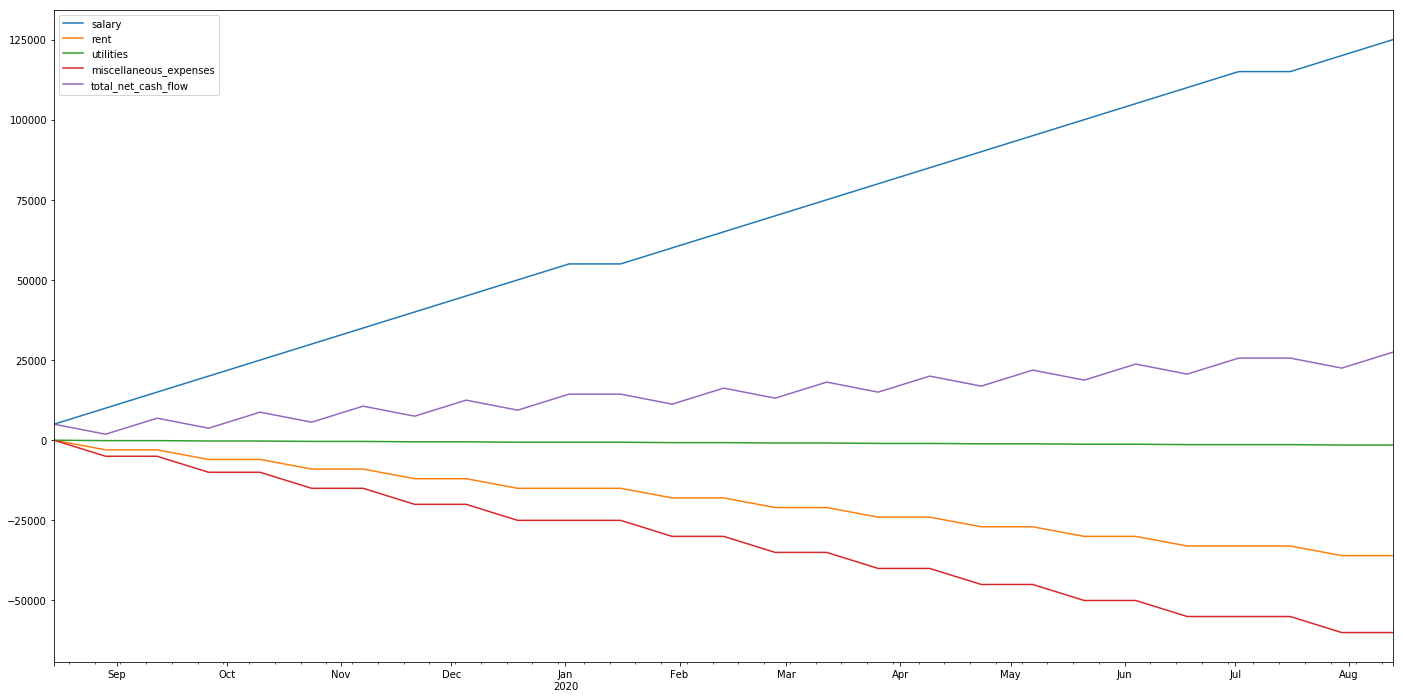

In [15]:
usr.all_cashflows.agg_cash_flows('14D').cumsum().plot(figsize=(24,12))

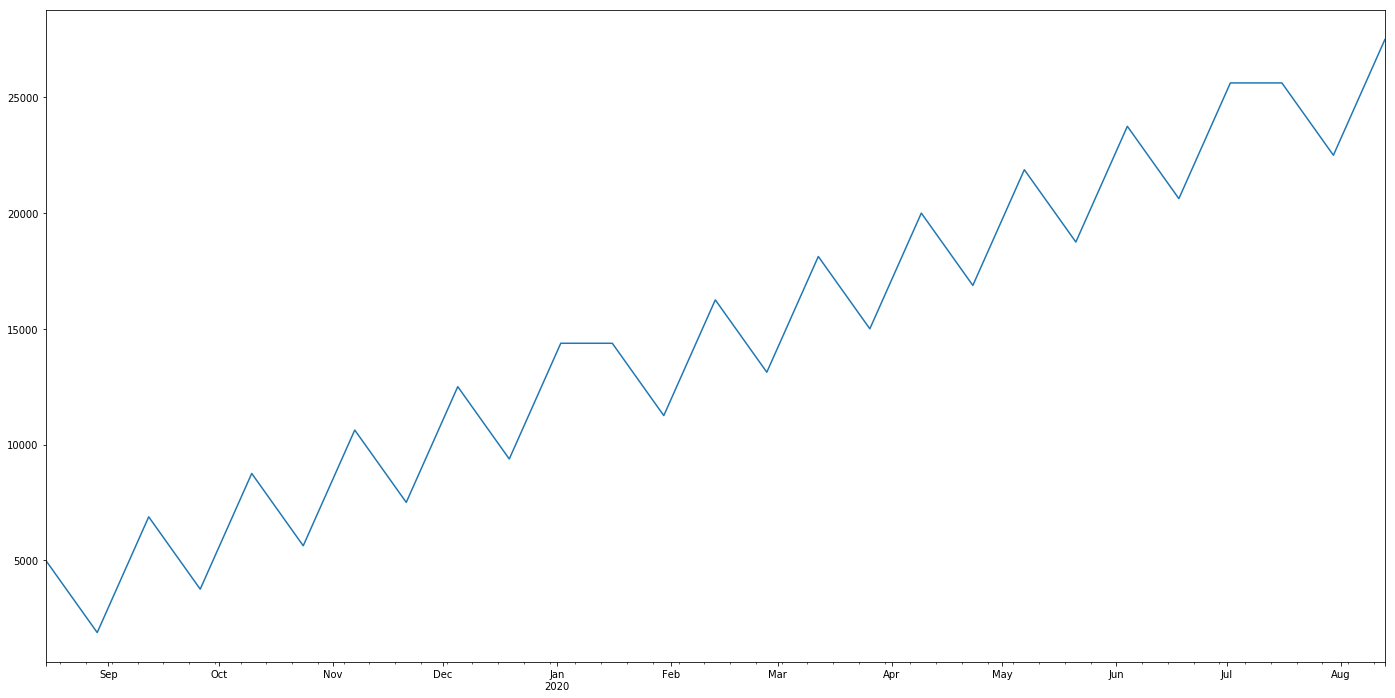

In [16]:
usr.all_cashflows.agg_cash_flows('14D').cumsum()['total_net_cash_flow'].plot(figsize=(24,12))

In [17]:
gameplan.contributions.Contribution.from_income_stream(s, pct=.05)

In [18]:
from gameplan.contributions import Contribution
from gameplan.assets import CashSavings

In [19]:
c = Contribution.from_income_stream(s, pct=0.05, label='salary_5%')

In [20]:
cs = CashSavings(initial_balance=12000, annualized_interest_rate=0.024)

In [21]:
cs.contributions.add_object(c, label='salary_5')

In [22]:
tmp = cs.contributions.as_df
tmp

,initial_balance,salary_5%,total_net_contribution
2019-08-03,12000.0,0.0,12000.0
2019-08-15,0.0,250.0,250.0
2019-08-31,0.0,250.0,250.0
2019-09-15,0.0,250.0,250.0
2019-09-30,0.0,250.0,250.0
2019-10-15,0.0,250.0,250.0
2019-10-31,0.0,250.0,250.0
2019-11-15,0.0,250.0,250.0
2019-11-30,0.0,250.0,250.0
2019-12-15,0.0,250.0,250.0


## Testing/Scratchwork

In [23]:
# Fixed payments - Lets assume you want to pay XX per month
# Minimum payments - Lets assume you make minimum payments
# Goal-based - Lets assume you want to pay back w/in XX years


In [24]:
# iss = InterestRateSeries(.063, name='6.3% Fixed Rate', freq='M')

In [25]:
# sd = StudentDebt(30000, 0.055)

In [26]:
# # TO DO:
# 1. (Maybe) Allow CashFlow to be instantiated w/ an existing CashFlow? A Series w/ variable $ amount?
# 2. CashFlows should be able to grow (change) through time rather than being fixed
# # 3. Instantiate CashFlow from a series

In [27]:
# reload(gameplan.assets)
# from gameplan.assets import CashSavings, Equity

In [28]:
# cash = CashSavings(initial_balance=20000, annualized_interest_rate=0.024)
# eq = Equity(init_value=12000)

In [29]:
# cash.contributions.add_object(Contribution.from_income_stream(s, pct=.12, label='salary_savings_2'))

In [30]:
# from gameplan.contributions import Contribution

In [31]:
# Portfolio = [
# Consumption,
# Debt servicing costs
# IncomeStreams = active (salary) + passive (asset-based),


# Assets,
# Liabilities 
# ]

In [32]:
from gameplan.collections import Collection, Expenses, IncomeStreams, CashFlowCollection
from gameplan.assets import Asset, Assets, CashSavings, Equity
from gameplan.liabilities import Liability
from gameplan.cashflows import CashFlow
# from gameplan.expenses import Expense

class Portfolio():
    def __init__(self, initial_cash_savings=0, interest_rate=0):
        self.assets = Assets(objects=dict(
            initial_savings=CashSavings(initial_balance=initial_cash_savings, annualized_interest_rate=interest_rate)
        ))
        self.liablities = Collection(collection_type=Liability, objects={})
        self.income_streams = IncomeStreams(income_streams={}) # includes salary, etc.
        self.consumption = Expenses(expenses={}) #+ ...

    
    def add_income_stream(self, income_stream, label=None, if_exists='error'):
        self.income_streams.add_object(income_stream, label, if_exists)


    def add_expense(self, expense, label=None, if_exists='error'):
        self.consumption.add_object(expense, label, if_exists)


    def add_asset(self, asset, label=None, if_exists='error'):
        self.assets.add_object(asset, label, if_exists)
        
    def add_liability(self, liability, label=None, if_exists='error'):
        self.liabilities.add_object(liability, label, if_exists)
        
        
    @property
    def income_streams_from_assets(self):
        ## You may wanna rip out the interest accumulation from CashSavings, put that as a property on Assets 
        ## or at least interest bearing assets
        pass
#         return {}

    @property
    def debt_service_from_liabilities(self):
        pass
#         return {}

    def transfer_value(from_x, to_y, amt=None, pct=None):
        pass
    
    @property
    def portfolio_cashflows(self):
        return CashFlowCollection(
            collection_type=CashFlow,
            objects=[
                self.income_streams_from_assets, 
                self.debt_service_from_liabilities,
                self.income_streams.contents,
                self.consumption.contents 
            ]
        )
        
    
    @property
    def portfolio_pv(self): # aka net_worth?
#         assets.pv + liabilibilities.pv + income_streams.pv + consumption.pv
        pass
    
    
    def simulate_portfolio_value(self):
        pass
    
    def plot_portfolio_value(self):
        pass
    
    #TO DO: Each of these functions should probs be defined at the IncomeStream/Asset/Liability/Expense level as well?
    #TO DO: Add functionality to add objects to each of the collections (i.e. add asset/liability//etc.)

In [33]:
# def income_stream_to_cash(income_stream, cash_account, contrib_pct, date_range, label=None):
#     transfer_values = [contrib_pct * x for x in income_stream.values]
#     c = Contribution(label, date_range, values=transfer_values)
#     income_stream.values = (pd.Series(income_stream.values) - pd.Series(transfer_values)).values
#     cash_account.contributions.add_object(c, label=label)
 

In [34]:
port = Portfolio(initial_cash_savings=12000, interest_rate=0.015)
port.add_income_stream(s, label='salary')
for e in expenses:
    port.add_expense(e)
port.assets.add_object(Equity(init_value=8000), label='401k_stocks')
# port.assets.

In [35]:
cs = port.assets.contents['initial_savings']

In [36]:
port.assets.contents

{'initial_savings': <gameplan.assets.CashSavings at 0x126e699b0>,
 '401k_stocks': <gameplan.assets.Equity at 0x126c4aeb8>}

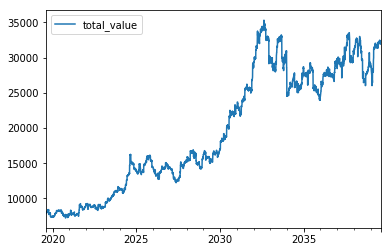

In [38]:
port.assets.contents['401k_stocks'].plot_price_paths()

In [63]:
cs.add_contribution(Contribution.from_income_stream(s, 0.05))

In [69]:
e = Equity()

In [123]:
# full_index = pd.DatetimeIndex.union(cs.contributions.total.index, Equity.DEFAULT_DATE_RANGE)
# t = (
#     cs.contributions.total
#     .reindex(index=full_index, fill_value=0)
#     .resample('D').sum() # downsample to daily)
# ) # get a daily view of contributions over the entire self.date_range
# date_diffs = t.index.to_series().diff()
# # compound_factors = date_diffs.apply(
# #     lambda x: np.e**(cs.annualized_interest_rate * x.days / 365.25)
# #     )
# compound_factors = (
#     pd.Series(
#         index=self.date_range,
#         data=self._generate_returns()
#     ).shift(1)
#     .reindex(index)
#     .resample('D')
#     .first()
#     .fillna(1.0)
# )

# totals = []
# total = 0
# for x, r in zip(t.values, compound_factors.values):
#     r = r if pd.notnull(r) else 0
#     total = x + r * total
#     totals.append(total)

# pd.Series(data=totals, index=t.index, name='total_value').head(16)

2019-08-03    12000.000000
2019-08-04    12000.000000
2019-08-05    12000.000000
2019-08-06    12014.872792
2019-08-07    11890.007855
2019-08-08    11919.047134
2019-08-09    11939.549221
2019-08-10    11939.549221
2019-08-11    11939.549221
2019-08-12    11964.872299
2019-08-13    11935.080243
2019-08-14    11845.976954
2019-08-15    12116.548204
2019-08-16    12078.896998
2019-08-17    12078.896998
2019-08-18    12078.896998
Freq: D, Name: total_value, dtype: float64

In [121]:
pd.Series(
        index=e.date_range,
        data=e._generate_returns(),
        name='blah'
    ).reindex(index).fillna()

2019-08-03         NaN
2019-08-05    1.002382
2019-08-06    1.000084
2019-08-07    1.000573
2019-08-08    0.995295
2019-08-09    0.997776
2019-08-12    1.001110
2019-08-13    0.995203
2019-08-14    0.999612
2019-08-15    1.009042
2019-08-16    1.002308
2019-08-19    1.004214
2019-08-20    1.001080
2019-08-21    0.998788
2019-08-22    1.000008
2019-08-23    1.000055
2019-08-26    1.004803
2019-08-27    1.000976
2019-08-28    0.999890
2019-08-29    1.008202
2019-08-30    1.005213
2019-08-31         NaN
2019-09-02    1.003894
2019-09-03    1.025710
2019-09-04    1.004079
2019-09-05    0.996944
2019-09-06    0.997190
2019-09-09    0.999176
2019-09-10    1.001025
2019-09-11    0.999141
                ...   
2039-06-23    1.001992
2039-06-24    1.003956
2039-06-27    0.995684
2039-06-28    1.004186
2039-06-29    1.034607
2039-06-30    1.002440
2039-07-01    1.000486
2039-07-04    0.999644
2039-07-05    0.997683
2039-07-06    0.996014
2039-07-07    0.995060
2039-07-08    1.003842
2039-07-11 

In [117]:
t

2019-08-03    12000.0
2019-08-04        0.0
2019-08-05        0.0
2019-08-06        0.0
2019-08-07        0.0
2019-08-08        0.0
2019-08-09        0.0
2019-08-10        0.0
2019-08-11        0.0
2019-08-12        0.0
2019-08-13        0.0
2019-08-14        0.0
2019-08-15      250.0
2019-08-16        0.0
2019-08-17        0.0
2019-08-18        0.0
2019-08-19        0.0
2019-08-20        0.0
2019-08-21        0.0
2019-08-22        0.0
2019-08-23        0.0
2019-08-24        0.0
2019-08-25        0.0
2019-08-26        0.0
2019-08-27        0.0
2019-08-28        0.0
2019-08-29        0.0
2019-08-30        0.0
2019-08-31      250.0
2019-09-01        0.0
               ...   
2039-07-05        0.0
2039-07-06        0.0
2039-07-07        0.0
2039-07-08        0.0
2039-07-09        0.0
2039-07-10        0.0
2039-07-11        0.0
2039-07-12        0.0
2039-07-13        0.0
2039-07-14        0.0
2039-07-15        0.0
2039-07-16        0.0
2039-07-17        0.0
2039-07-18        0.0
2039-07-19

In [116]:
compound_factors

2019-08-05    1.000000
2019-08-06    0.998219
2019-08-07    1.001303
2019-08-08    1.000210
2019-08-09    0.998485
2019-08-10    1.000000
2019-08-11    1.000000
2019-08-12    0.992369
2019-08-13    0.998050
2019-08-14    0.997643
2019-08-15    0.995532
2019-08-16    1.005220
2019-08-17    1.000000
2019-08-18    1.000000
2019-08-19    0.996309
2019-08-20    1.001277
2019-08-21    1.001181
2019-08-22    1.003717
2019-08-23    1.000835
2019-08-24    1.000000
2019-08-25    1.000000
2019-08-26    0.999169
2019-08-27    0.999180
2019-08-28    0.998883
2019-08-29    0.994025
2019-08-30    0.997462
2019-08-31    1.000000
2019-09-01    1.000000
2019-09-02    0.998336
2019-09-03    0.986368
                ...   
2039-07-05    1.000074
2039-07-06    0.998131
2039-07-07    0.942258
2039-07-08    1.002169
2039-07-09    1.000000
2039-07-10    1.000000
2039-07-11    1.004392
2039-07-12    1.002181
2039-07-13    1.000184
2039-07-14    1.048375
2039-07-15    0.993484
2039-07-16    1.000000
2039-07-17 

In [115]:
pd.Series(data=totals, index=t.index, name='total_value')

ValueError: Length of passed values is 7304, index implies 7306

2019-08-03    12000.0
2019-08-15      250.0
2019-08-31      250.0
2019-09-15      250.0
2019-09-30      250.0
2019-10-15      250.0
2019-10-31      250.0
2019-11-15      250.0
2019-11-30      250.0
2019-12-15      250.0
2019-12-31      250.0
2020-01-15      250.0
2020-01-31      250.0
2020-02-15      250.0
2020-02-29      250.0
2020-03-15      250.0
2020-03-31      250.0
2020-04-15      250.0
2020-04-30      250.0
2020-05-15      250.0
2020-05-31      250.0
2020-06-15      250.0
2020-06-30      250.0
2020-07-15      250.0
2020-07-31      250.0
2020-08-15      250.0
Name: total_net_contribution, dtype: float64

In [77]:
cs.contributions.as_df['total_net_contribution'].multiply(r, axis=0) 

2019-08-03           NaN
2019-08-05           NaN
2019-08-06           NaN
2019-08-07           NaN
2019-08-08           NaN
2019-08-09           NaN
2019-08-12           NaN
2019-08-13           NaN
2019-08-14           NaN
2019-08-15    249.077332
2019-08-16           NaN
2019-08-19           NaN
2019-08-20           NaN
2019-08-21           NaN
2019-08-22           NaN
2019-08-23           NaN
2019-08-26           NaN
2019-08-27           NaN
2019-08-28           NaN
2019-08-29           NaN
2019-08-30           NaN
2019-08-31           NaN
2019-09-02           NaN
2019-09-03           NaN
2019-09-04           NaN
2019-09-05           NaN
2019-09-06           NaN
2019-09-09           NaN
2019-09-10           NaN
2019-09-11           NaN
                 ...    
2039-06-23           NaN
2039-06-24           NaN
2039-06-27           NaN
2039-06-28           NaN
2039-06-29           NaN
2039-06-30           NaN
2039-07-01           NaN
2039-07-04           NaN
2039-07-05           NaN


In [65]:
cs.contributions.as_df['total_net_contribution'] * pd.Series(
            index=self.date_range,
            data=returns,
            name=label
        ).cumprod().shift(1).fillna(1.0)Equity._generate_returns

,initial_balance,5% Contribution from salary,total_net_contribution
2019-08-03,12000.0,0.0,12000.0
2019-08-15,0.0,250.0,250.0
2019-08-31,0.0,250.0,250.0
2019-09-15,0.0,250.0,250.0
2019-09-30,0.0,250.0,250.0
2019-10-15,0.0,250.0,250.0
2019-10-31,0.0,250.0,250.0
2019-11-15,0.0,250.0,250.0
2019-11-30,0.0,250.0,250.0
2019-12-15,0.0,250.0,250.0


In [57]:
port.portfolio_cashflows.as_df.head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-08-15,5000.0,0.0,0.0,0.0,5000.0
2019-08-31,5000.0,0.0,0.0,-5000.0,0.0
2019-09-01,0.0,-3000.0,-125.0,0.0,-3125.0
2019-09-15,5000.0,0.0,0.0,0.0,5000.0
2019-09-30,5000.0,0.0,0.0,-5000.0,0.0


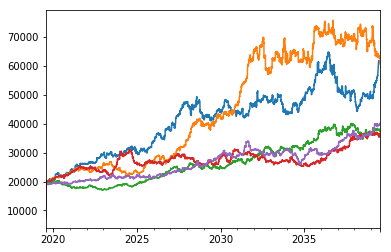

In [153]:
for x in range(5):
    port.assets.generate_value_path().plot()

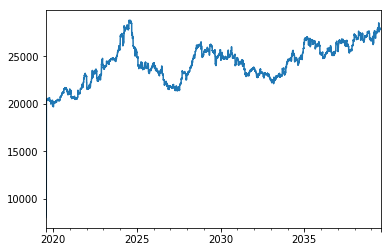

In [151]:
port.assets.generate_value_path().plot()

# DB YOU ARE HERE

# You are:
1. Creating an Assets Collection object that combines different assets together, mostly to get their value through time
2. We are simulating all assets in the Collection together rather than getting a bunch of simulations for each asset and then combining them
3. We can potentially borrow cashflow collection logic for pretty display/combo of some info, but main diff is assets have a value through time (its like a cumsum() rather than discrete things)
4. Watch out, we moved _collection_type_str on to Collection rather than CashFlowCollection

Other notes:
    1. There's stochasticity in salary:
        - % growth
        - Job change % (voluntary & getting fired)
        - time between jobs
        - etc.
    2. One UX thing is having the functionality to highlight a single user "lifetime": here's what your life would be like if you got xx returns, had this salary path, blah blah

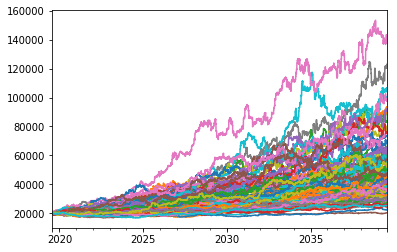

In [138]:
for x in range(100):
#     assets_df = pd.DataFrame({k: v.simulate_path() for k,v in port.assets.contents.items()})
    pd.DataFrame({k: v.simulate_path() for k,v in port.assets.contents.items()}).fillna(method='bfill').sum(axis=1).plot()

In [142]:
assets_df.tail()

,initial_savings,401k_stocks
2039-07-17,16195.644997,12798.617590
2039-07-18,16196.310129,12848.402140
2039-07-19,16196.975289,12537.212820
2039-07-20,16197.640476,12495.921349
2039-07-21,16198.305691,12540.514907


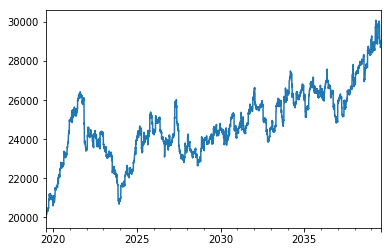

In [136]:
assets_df.fillna(method='bfill').sum(axis=1).plot()

In [119]:
# assets_df['401k_stocks'].fil
assets_df['401k_stocks'].fillna(method='ffill').fillna(method='bfill')

2019-07-21     8011.700582
2019-07-22     8011.700582
2019-07-23     8001.208775
2019-07-24     7999.436112
2019-07-25     8003.501727
2019-07-26     8018.221626
2019-07-27     8018.221626
2019-07-28     8018.221626
2019-07-29     8060.038654
2019-07-30     8066.764632
2019-07-31     8054.938184
2019-08-01     8064.518482
2019-08-02     8042.020979
2019-08-03     8042.020979
2019-08-04     8042.020979
2019-08-05     8071.366209
2019-08-06     8040.621998
2019-08-07     8046.895233
2019-08-08     8014.705957
2019-08-09     8020.308015
2019-08-10     8020.308015
2019-08-11     8020.308015
2019-08-12     7981.419148
2019-08-13     7926.790053
2019-08-14     7962.527619
2019-08-15     8037.152551
2019-08-16     8069.660980
2019-08-17     8069.660980
2019-08-18     8069.660980
2019-08-19     8099.577777
                  ...     
2039-06-22    56138.997313
2039-06-23    56003.758778
2039-06-24    56102.512940
2039-06-25    56102.512940
2039-06-26    56102.512940
2039-06-27    56108.965293
2

In [40]:
test = port.assets.contents['initial_savings']

In [41]:
test.

2019-07-21    12000
Freq: D, Name: total_value, dtype: int64

In [56]:
# a.assets.contents[]
cashflow_cash = CashSavings(annualized_interest_rate=0.001)
# cashflow_cash.
cashflow_cash.add_contribution(
    Contribution('cashflows', date_range=cont_to_cash.index, values=cont_to_cash.values)
)

In [58]:
a.add_asset(cashflow_cash)

In [45]:
a.assets.contents['initial_savings'].value_through_time

2019-07-06    12000
Freq: D, Name: total_value, dtype: int64

In [217]:
t_from = s
t_to = CashSavings(initial_balance=40)
pct = .05
date_range = s.date_range
label='from_sal'

In [ ]:
# input_dict = {a}

In [ ]:
print(t_from.cash_flows_df.head())
print(t_to.contributions.head())

In [234]:
transfer_values = [pct * x for x in t_from.values]
c = Contribution(label, date_range, values=transfer_values)
t_from.values = (pd.Series(t_from.values) - pd.Series(transfer_values)).values
t_to.contributions.add_object(c, label=label)

In [238]:
def income_stream_to_cash(income_stream, cash_account, contrib_pct, date_range, label=None):
    transfer_values = [contrib_pct * x for x in income_stream.values]
    c = Contribution(label, date_range, values=transfer_values)
    income_stream.values = (pd.Series(income_stream.values) - pd.Series(transfer_values)).values
    cash_account.contributions.add_object(c, label=label)
    
    

In [111]:
print(s.cash_flows_df.head())
print(t_to.contributions.as_df.head())

            salary
2019-07-15  5000.0
2019-07-31  5000.0
2019-08-15  5000.0
2019-08-31  5000.0
2019-09-15  5000.0


NameError: name 't_to' is not defined

In [242]:
s1, cs1 = income_stream_to_cash(s, t_to, 0.075, s.date_range, label='test')

In [ ]:
def compound_interest(principal, rate, times_per_year, years):
    # (1 + r/n)
    body = 1 + (rate / times_per_year)
    # nt
    exponent = times_per_year * years
    # P(1 + r/n)^nt
    return principal * pow(body, exponent)

In [244]:
print(s.cash_flows_df.head())
print(t_to.contributions.total.head())

            salary
2019-07-31  4162.5
2019-08-31  4162.5
2019-09-30  4162.5
2019-10-31  4162.5
2019-11-30  4162.5
2019-07-31    337.5
2019-08-31    337.5
2019-09-30    337.5
2019-10-31    337.5
2019-11-30    337.5
Freq: M, Name: total_net_contribution, dtype: float64


In [241]:
t_to.contributions.as_df

In [232]:
t_from.values = (pd.Series(t_from.values) - pd.Series(transfer_values)).values

In [233]:
t_from.cash_flows_df

,salary
2019-07-31,4500.0
2019-08-31,4500.0
2019-09-30,4500.0
2019-10-31,4500.0
2019-11-30,4500.0
2019-12-31,4500.0
2020-01-31,4500.0
2020-02-29,4500.0
2020-03-31,4500.0
2020-04-30,4500.0


In [231]:
t_from_new = t_from.values 

In [224]:
(pd.Series(t_from.values) - pd.Series(transfer_values))

0     4750.0
1     4750.0
2     4750.0
3     4750.0
4     4750.0
5     4750.0
6     4750.0
7     4750.0
8     4750.0
9     4750.0
10    4750.0
11    4750.0
12    4750.0
dtype: float64

In [220]:
transfer

2019-07-31    250.0
2019-08-31    250.0
2019-09-30    250.0
2019-10-31    250.0
2019-11-30    250.0
2019-12-31    250.0
2020-01-31    250.0
2020-02-29    250.0
2020-03-31    250.0
2020-04-30    250.0
2020-05-31    250.0
2020-06-30    250.0
2020-07-31    250.0
Freq: M, Name: from_sal, dtype: float64

In [215]:
c = Contribution(contribution_label='from_sal', date_range=date_range, values=)


In [216]:
c.cash_flows_df

,from_sal
2019-07-31,250.0
2019-08-31,250.0
2019-09-30,250.0
2019-10-31,250.0
2019-11-30,250.0
2019-12-31,250.0
2020-01-31,250.0
2020-02-29,250.0
2020-03-31,250.0
2020-04-30,250.0


In [132]:
a = Portfolio()
a.add_asset(CashSavings(initial_balance=1320), label='first_contribution', if_exists='overwrite')
a.add_income_stream(s, label='salary', if_exists='overwrite')
for e in expenses:
    a.add_expense(e, e.name, if_exists='overwrite')

In [129]:
cfc = CashFlowCollection(objects=[
                a.income_streams_from_assets, 
                a.debt_service_from_liabilities,
                a.income_streams.contents,
                a.consumption.contents 
            ])

## Stock

In [74]:
import quandl
import numpy as np
import matplotlib.pyplot as plt

start = "2016-01-01"
end = "2016-12-31"

df = quandl.get("WIKI/AMZN", start_date = start, end_date = end)

print(df.head())  # taking a look at the first 5 rows

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [ ]:
# mu, sigma, distribution?
# start_dt, end_dt, trading days ('B' - business days in pandas)
# start_price

# def _generate_returns(mu, sigma, distribution?, date_range)
# def _generate_price_path(start_price, returns)
# def generate_price_paths(how_many, start_price, mu, sigma, date_range)
# def plot_price_paths(price_paths)

In [ ]:
fecon236.prob.sim.gmix2prices(N=256*10, inprice=1)

In [163]:
fecon236.prob.sim.gmix2ret()

In [165]:
fe_sim.SPXmean

0.065026

In [169]:
fe_sim.SPXsigma

0.154936

In [173]:
dr = pd.date_range(start=pd.datetime.today(), end=pd.datetime(2025, 1, 1), freq='B')

In [174]:
len(dr)

1422

In [226]:
a = Equity(init_value=4000)

In [ ]:
a._generate_returns()

In [270]:
import fecon236.prob.sim as fe_sim
import random 

class Equity(): # should be type Investment
    DEFAULT_DATE_RANGE = pd.date_range(
        start=pd.datetime.today().date(), 
        end=pd.datetime.today().date() + pd.DateOffset(years=10), 
        freq='B'
    )
    DEFAULT_MU = fe_sim.SPXmean
    DEFAULT_SIGMA = fe_sim.SPXsigma
    
    def __init__(self, ticker='SPY', init_value=1, mu=DEFAULT_MU, sigma=DEFAULT_SIGMA, date_range=DEFAULT_DATE_RANGE):
        self.ticker=ticker
        self.init_value = init_value
        self.mu = mu
        self.sigma = sigma
        self.date_range = date_range

        
    def _generate_returns(self):
        return fe_sim.gmix2ret(N=len(self.date_range), mean=self.mu, sigma=self.sigma)


    def _generate_price_path(self, label=None):
        returns = self._generate_returns()
        prices = self.init_value * pd.Series(index=self.date_range, data=returns, name=label).cumprod()
        
        return prices
       
    
    def _generate_price_paths(self, how_many, write_type=None):
        """
            write_type: str, default None
                None - don't save paths to object
                overwrite - overwrite whatever's in self._price_paths
                append - add to whatever's in self._price_paths
                error - raise ValueError when self._price_paths is not empty else write to it
        """
        paths = []
        for x in range(how_many):
            paths.append(self._generate_price_path())
        
        # TO DO: This is probably unacceptably gross, so we should rewrite it
        if write_type is None:
            pass
        elif write_type == 'overwrite':
            self._price_paths = paths
        elif write_type == 'append':
            if hasattr(self, '_price_paths'):
                self._price_paths.append(paths)
            else:
                self._price_paths = paths
        elif write_type == 'error':
            if hasattr(self, '_price_paths'):
                raise ValueError("self._price_paths is not empty, if you want to overwrite or append, specify w/ write_type")
            else:
                self._price_paths = paths
        else:
            raise ValueError(f"{write_type} is not an acceptable value for write_type")
            
        return paths

    
    def plot_price_paths(self, max_plots=1, random_sample=True, **kwargs):
        all_paths = self._price_paths if hasattr(self, '_price_paths') else self._generate_price_paths(how_many=max_plots)
        paths_to_plt = random.sample(all_paths, max_plots) if random_sample else all_paths[:max_plots]
        return pd.concat(paths_to_plt, axis=1).plot(**kwargs)
        
        
    def plot_price_path_quantiles(self, min_n=200, quantiles=[0.01, 0.05, 0.5, 0.95, 0.99], return_df=False, 
                                  show_mean=False, **kwargs):
        n_paths_to_gen = min_n if not hasattr(self, '_price_paths') else min_n - len(self._price_paths)
        new_paths = self._generate_price_paths(how_many=n_paths_to_gen)
        all_paths = self._price_path.append(new_paths) if hasattr(self, '_price_paths') else new_paths
        all_paths_df = pd.concat(all_paths, axis=1)
        quantiles = all_paths_df.quantile(q=quantiles, axis=1).T
        if show_mean: quantiles['mean'] = all_paths_df.mean(axis=1)
        quantiles.plot(**kwargs)
        if return_df: return quantiles
        
        

In [271]:
e = Equity(date_range=pd.date_range(
        start=pd.datetime.today().date(), 
        end=pd.datetime.today().date() + pd.DateOffset(years=25), 
        freq='B'
    ))

In [259]:
q_df.tail()

,0.25,0.5,0.75
2029-07-16 14:33:53.905467,1.136812,1.615953,2.180428
2029-07-17 14:33:53.905467,1.137511,1.610707,2.184804
2029-07-18 14:33:53.905467,1.145317,1.618897,2.182598
2029-07-19 14:33:53.905467,1.143596,1.627481,2.183679
2029-07-20 14:33:53.905467,1.146446,1.621543,2.188292


In [153]:
price_paths = pd.concat(data, axis=1)

In [154]:
price_paths.apply(lambda x: x.describe(), axis=1)

,count,mean,std,min,25%,50%,75%,max
0,10000.0,1.000284,0.010039,0.891896,0.997535,1.000253,1.002965,1.116847
1,10000.0,1.000688,0.014048,0.891117,0.996352,1.000587,1.004746,1.119565
2,10000.0,1.001092,0.016827,0.889035,0.995466,1.000966,1.006388,1.157606
3,10000.0,1.001548,0.019508,0.865252,0.994567,1.001248,1.007998,1.171777
4,10000.0,1.001863,0.021771,0.863745,0.993723,1.001525,1.009614,1.169489
5,10000.0,1.002110,0.023845,0.856402,0.992853,1.001953,1.010985,1.168283
6,10000.0,1.002385,0.025833,0.858983,0.992020,1.002063,1.012702,1.167790
7,10000.0,1.002693,0.027575,0.858470,0.991094,1.002353,1.014259,1.167823
8,10000.0,1.002876,0.029227,0.859568,0.990058,1.002528,1.015681,1.173772
9,10000.0,1.002898,0.030861,0.855058,0.988820,1.002634,1.016693,1.173583


In [156]:
(price_paths <= .9).mean(axis=1).tail()

2555    0.1012
2556    0.1021
2557    0.1016
2558    0.1014
2559    0.1019
dtype: float64

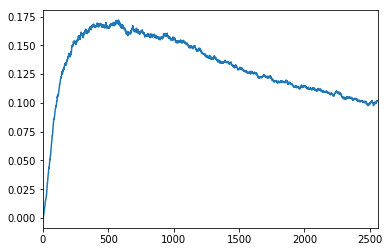

In [155]:
(price_paths <= .9).mean(axis=1).plot()

In [159]:
print(fecon236.map)

Annotated tree map of package directory [with module aliases]
    fecon236
    ├── __init__.py   (Router, sole non-empty __init__.py file herein)
    ├── tool.py       (Tools, low-level essentials)
    ├── top.py        (Top priority, experimental)
    ├── boots   (Bootstrap)
    │   └── bootstrap.py   [bs]
    ├── dst   (Distributions)
    │   └── gaussmix.py   [gmix]
    ├── econ
    │   └── infl.py
    ├── futures
    │   └── cftc.py
    ├── host
    │   ├── fred.py
    │   ├── hostess.py
    │   ├── qdl.py
    │   ├── _ex_Quandl.py
    │   └── stock.py
    ├── math
    │   └── matrix.py   [mat]
    ├── ml   (Machine Learning)
    │   └── learn.py
    ├── oc   (Optimization Control)
    │   └── optimize.py   [op]
    ├── parse
    │   └── sec.py
    ├── prob   (Probability)
    │   └── sim.py   (Simulation)
    ├── prtf   (Porfolio theory)
    │   └── boltzmann.py   [boltz]
    ├── rates  (Fixed Income)
    │   ├── credit.py
    │   └── fedfunds.py
    ├── tsa    (Time Series Analys

In [ ]:
(price_paths <= .9).mean(axis=1).plot()

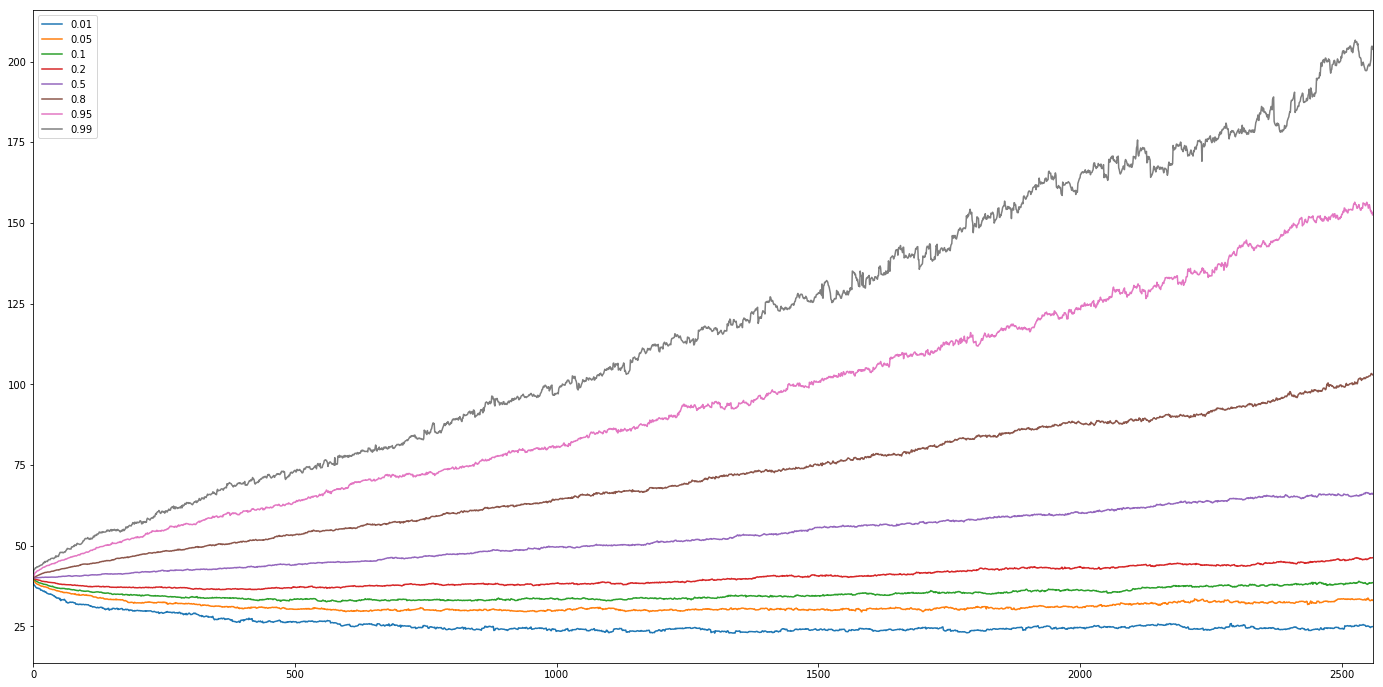

In [144]:
price_paths.quantile(q=[0.01, 0.05, 0.1, .2, .5, 0.8, 0.95, 0.99], axis=1).T.plot(figsize=(24,12))